# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# There are multiple ways to get the answer; however, will use the straight way shape method to get the answer:
print( 'the dataset has total rows of: ', df.shape[0])
print( 'and has total columns of: ', df.shape[1])

the dataset has total rows of:  1898
and has total columns of:  9


#### Observations:
-  The dataset has 9 columns and 1898 rows

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
from info() function we can observe the data types of the dataset as under:
-  the data has one type as float64.
-  the data has four types as int64.
-  the data has four types as object.
-  Additionally, we observe that there are no missing values in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# To check missing values, we may use isnull() function and sum() to check the same:

df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
-  As we can see that all columns has no missing values using function isnull(). However, we observed that already from info() function.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
## to check the statistical summary, we may use describe() function:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
we observe from the statistical function above the followig:
-  the minimum time taken for food to be prepared once the order is placed is: 20 minutes
-  the Maximum time taken for food to be prepared once the order is placed is: 35 minutes
-  the Average time taken for food to be prepared once the order is placed is: 23 minutes
-  Additionally, we observe that food_preparation column has the lowest standrad deviation value among others.




### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# we can use value_counts()function, which will return series of unique values' count in the selected column

df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
# also, let's have an overview on what is the percentage for non given orders in the given data:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
 -  We observe that count of, non rating orders are 736, represented in object " not given"
 -  Additionally, not given ratings percentage out of given data in same column are 38.78% 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# first let's explore the dataset coulmns to streamline our analysis processes:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Col 1 to 3 - let's count unique values in the dataset such as order ID, customer ID and restaurant name using nunique ()function and for loop

In [11]:
unique = ['order_id', 'customer_id','restaurant_name']
for i in unique :
    print (df[unique].nunique())
    break

order_id           1898
customer_id        1200
restaurant_name     178
dtype: int64


#### observations
we observe the following:
-  total unique orders IDs are 1898 which mean that each row represnent 1 unique order.
-  total customer IDs are 1200
-  total restaurant names are 178

#### Col 4 - let's explore  different types of cuisines and their count respectively:

In [12]:
## will use nunique function to know the count of cuisines:
df['cuisine_type'].nunique()

14

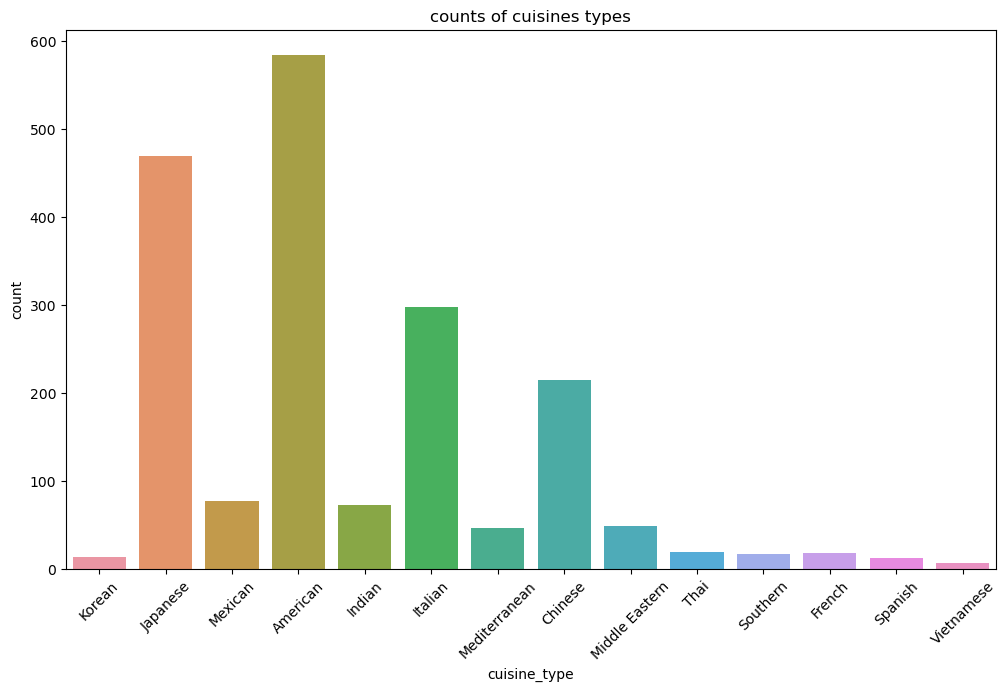

In [13]:
## will visualize the cuisine_type using count plot since they're categorical data

plt.figure(figsize=(12,7))
plt.title('counts of cuisines types')
sns.countplot(df, x = 'cuisine_type');
plt.xticks(rotation = 45);

#### Observations
-  We observe that number of unique cuisines are 14.
-  American cuisine is the highiest count alomst close to 600.
-  Vietnamese cuisine the lowest count in the given data.
-  American, Japanese, Italian, chienese, and mixican are the top 5 cuisines in terms of counts.
-  Indian cuisine is pretty close to mixican cuisine.

#### Col 5- let's explore the data in cost of order column by checking data distribution and outliers if any! using histogram and boxplot visual

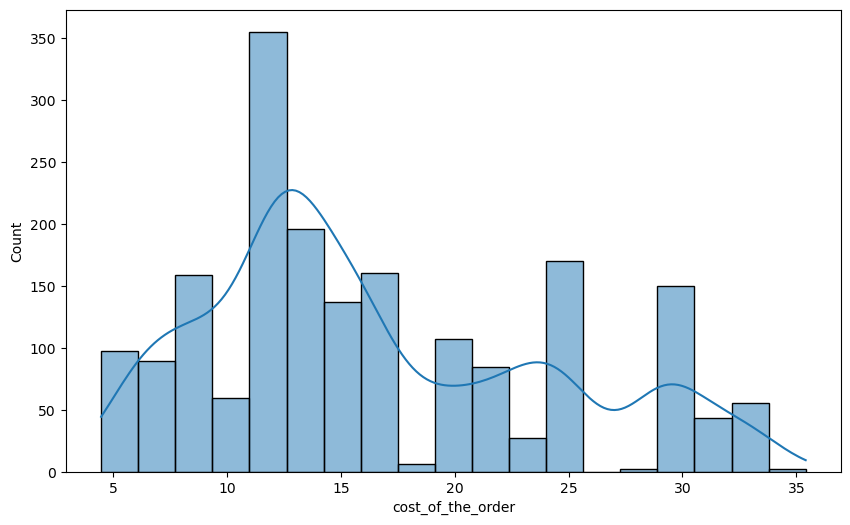

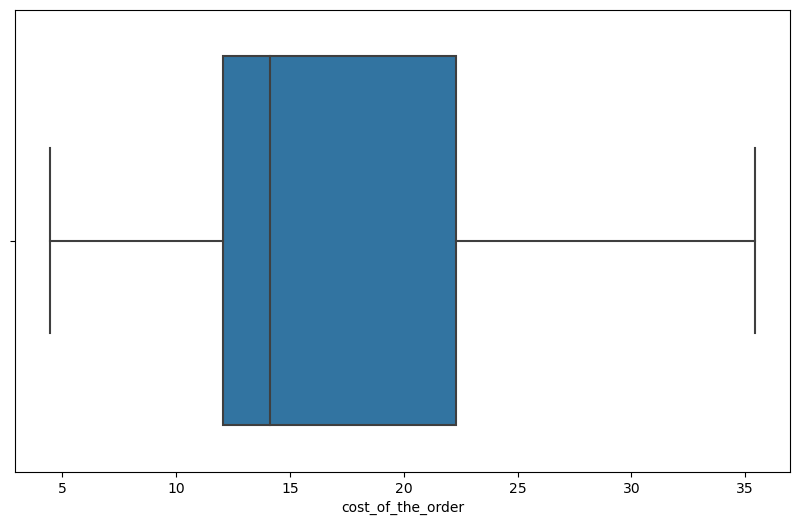

In [14]:
## using histogram will show the data distribution for numerical values
plt.figure(figsize=(10,6))
sns.histplot(df, x = 'cost_of_the_order', kde= True)
plt.show()
## using boxplot will identify the outliers 
plt.figure(figsize=(10,6))
sns.boxplot(df,x = 'cost_of_the_order')
plt.show()

#### Observations
looking to the Histogram and boxplot of cost_of_order, we find-out the following:
-  the data are skewed to the right which mean that most of the data are in the higher side.
-  50% of the data at cost of 14.14.
-  data range are between approx 12 & 23.
-  there are no outliers.

#### Col 6- let's check day_of_the_week column by exploring total of uniquie values and count plot


In [15]:
## will use nunique() function to check the no. of unique values
df['day_of_the_week'].nunique()

2

In [16]:
## will use value counts() to check the deffirent types of week day (weekday\weekend)
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

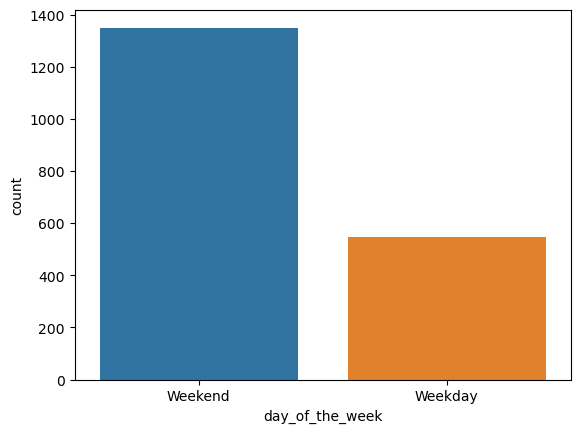

In [17]:
## will visualize the day of week coulmn by using countplot
sns.countplot(df, x = 'day_of_the_week');

#### Observations
- we observe that in the column day of the week , 2 unique values such as weekday & weekend
- weekend days are more than weekdays, which mean that most of orders are been taken in  weekend rather than weekdays
- weekend orders counts are: 1351, and weekdays are: 547 

#### Col 7 - let's check the rating column by exploring number of unique values and visualing it by using countplot

In [18]:
## will use nunique function to check no. of values in rating column:

df['rating'].nunique()

4

In [19]:
## will use value counts function to check types of rating:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

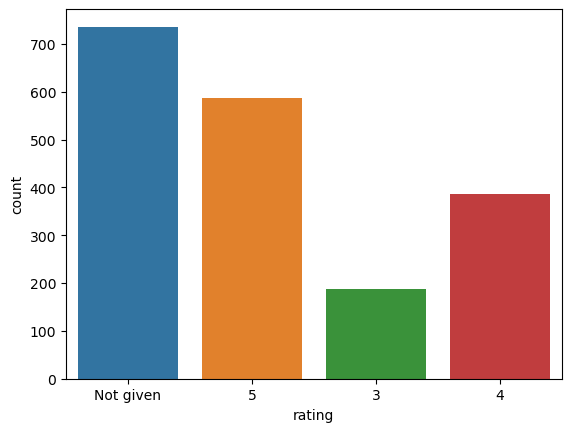

In [20]:
## will use countplot to visual the rating column and get some insights about it:
sns.countplot(df, x= 'rating');

#### Observation
-  we observe that no. of unique values in rating column are 4 which rating from 3 to 5 plus additional category of not given rating.
- the most given rating as per the given data is 5 rating equal to 588 followed by 4 rating at 386 rating; however, the lowest given rating is 3 which equal to 188.
- there are 736 customers have been not given a rating which mean that large of customers do not like to give rating.

#### Col 8 - let's check food_preparation_time by visualizing it by using histogram and boxplot

In [21]:
## let's check the column data type to choose the appropriate visual for it.
df['food_preparation_time'].dtype

dtype('int64')

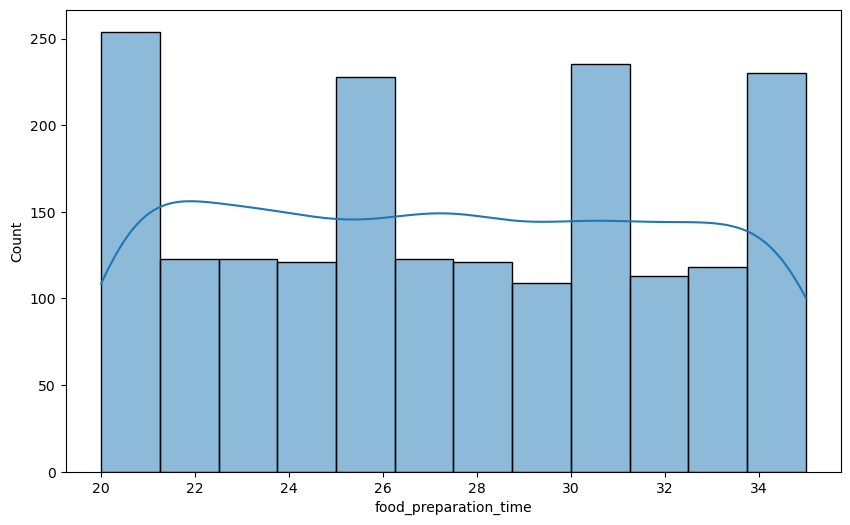

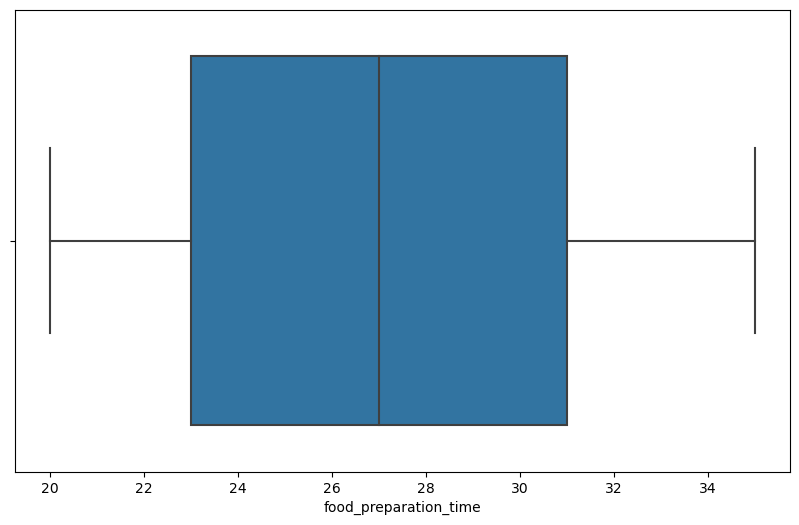

In [22]:
## then, let's check the data distribtion by applying histogram visual
plt.figure(figsize=(10,6))
sns.histplot(df, x = 'food_preparation_time', kde = True);

## will use also boxplot to check the outliers
plt.figure(figsize=(10,6))
sns.boxplot(df, x = 'food_preparation_time');

#### Obserations

 - we observe that food time preparation distribution seems to be normal.
 - Min time for food preparation is 20 minutes and the max is 35 minutes.
 - 50% of the orders are taking around 27 minutes for preparation.
 - there are no outliers in the time required for food preparations.

#### Col 9 - let's check Delivery_time by visualizing it by using histogram and boxplot

In [23]:
## let's check the column data type to choose the appropriate visual for it.
df['delivery_time'].dtype

dtype('int64')

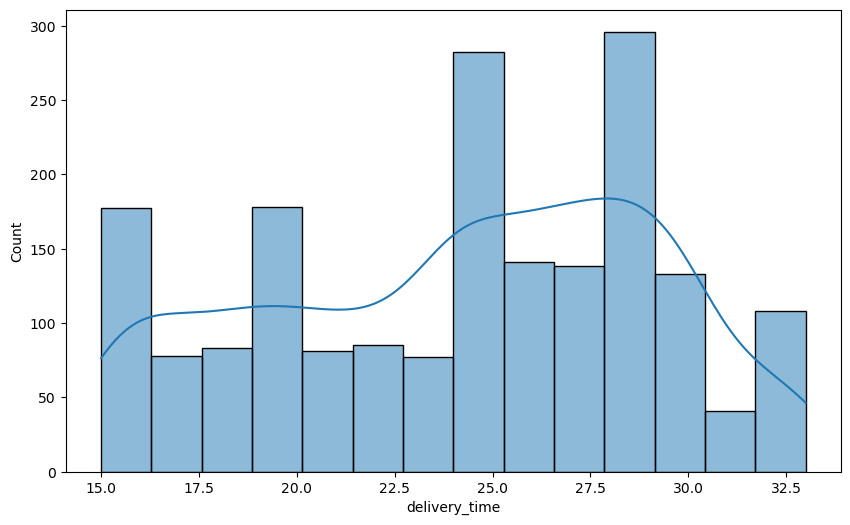

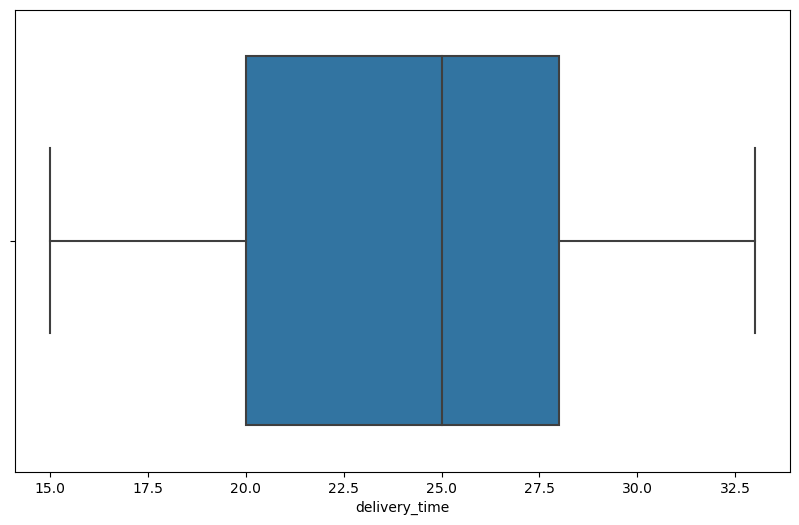

In [24]:
## let's check the data distribtion by applying histogram visual
plt.figure(figsize=(10,6))
sns.histplot(df, x = 'delivery_time', kde = True);

## will use also boxplot to check the outliers
plt.figure(figsize=(10,6))
sns.boxplot(df, x = 'delivery_time');

#### Observations
-  the distribution of the delivery time seems to be little bit left skewed, which mean that most of the data are in the lower side
-  the min time of delivery is 15 minutes, however, the mix is 33 minutes
-  50% of the time delivery are in 25 minutes
-  there are no outliers in the given data

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
## will use value counts and head function to get the answer:
df['restaurant_name'].value_counts().sort_values(ascending = False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
since we have observed earlier that each row in order id column has unique order ID and there were no missing data in the full dataset, therefore, by calculating the value counts of resutaurant name will get the answer of Q7.
Furthermore, we observe that restaurant name shake shake has the highest orders numbers among others i.e. 219 order.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Will make supset from the dataset where we collect all cuisine types requested in weekend 
cuisine_weekend = df[df['day_of_the_week'] == 'Weekend']
cuisine_weekend.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [27]:
## will do double check to make sure that we picked only weekend days!
cuisine_weekend.day_of_the_week.value_counts()

Weekend    1351
Name: day_of_the_week, dtype: int64

In [28]:
# then, will do value counts to get the most popular cusine requested in weekend
cuisine_weekend.cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
we observe that American cuisine is the most popular one in weekend at count of 415. Moreover, we have observed earlier that American cuisine is the most popular one among other cuisines types.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [29]:
# Will make supset from the dataset where we collect all data pertains to the costs greater than $20:
cost_Above_20 = df[df['cost_of_the_order']> 20].shape[0]
cost_Above_20

555

In [30]:
# will calculate no. of total orders in the full dataset to get percentage in a simple calculation as under:
percentage = round((cost_Above_20 / df.shape[0]) * 100,2)
print(f" The percentage of orders that above 20$ out of the total orders is: {percentage}%")

 The percentage of orders that above 20$ out of the total orders is: 29.24%


#### Observations:
29% of the orders cost greater than 20$

### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# will use df.mean() function to get the answer.
del_time_mean = round(df['delivery_time'].mean(),2)
print(f"The mean of order delivery time is: {del_time_mean} min.")

The mean of order delivery time is: 24.16 min.


#### Observations:
The mean of order delivery time is: 24.16 min.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# will do value counts for customer ID followed by head(3) function
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
the customers ids whom are eligble for 20% voucher discount are, 52832, 47440,and 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### 1 - let's do multivariate analysis to explore the relationship between cuisine type and cost of order (cat vs num)

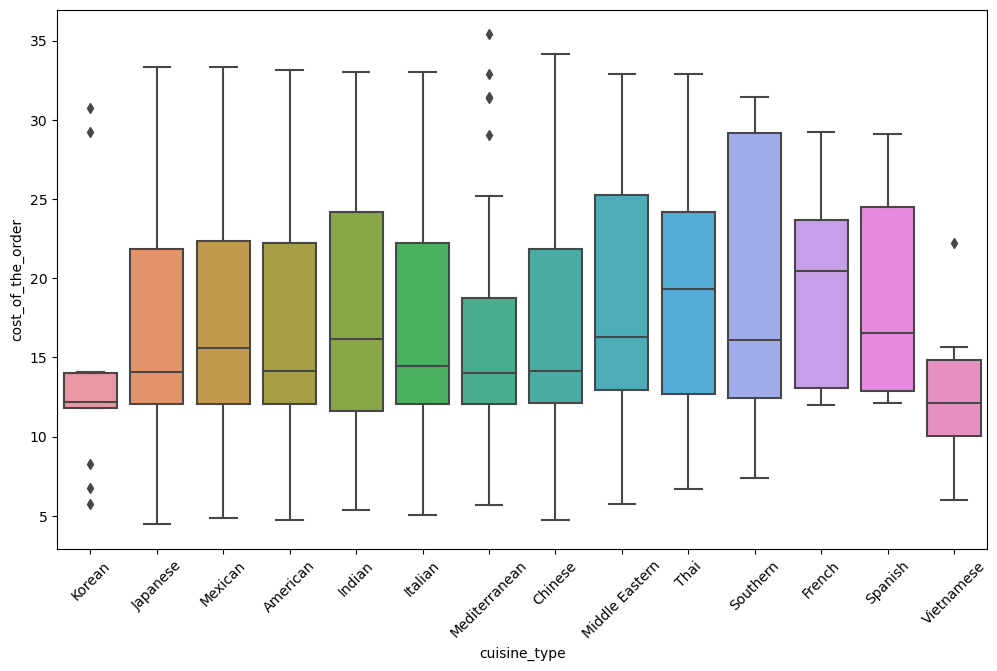

In [33]:
# will use boxplot for this analysis 
plt.figure(figsize=(12,7))
sns.boxplot( df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 45)
plt.show()


#### observations
- we observe that the cost mean for all cuisine are less than 22$
- there are not many outliers in the data except few such as korean, medite. and vietn. cuisne
- southern cuisine is the most right skewed shape compare to others
- vietnamese cuisine looks close to normal distribution

#### 2 - let's do multivariate analysis to explore the relationship between cuisine type and food preparation time (cat vs cat)

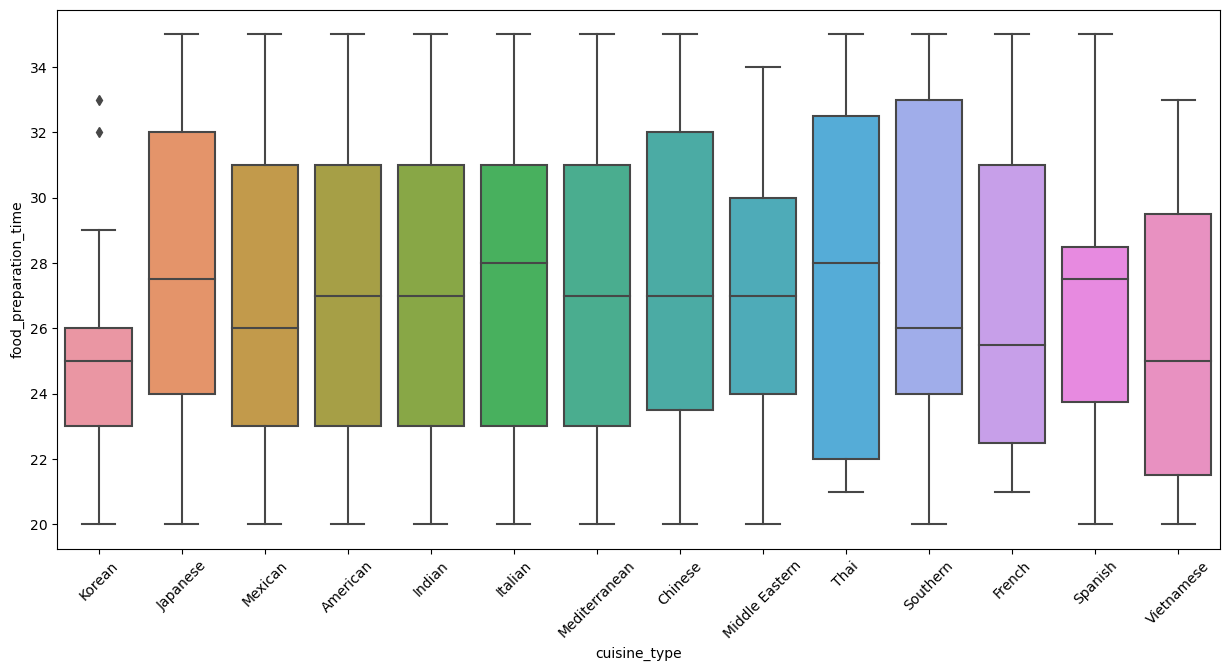

In [34]:
# will use boxplot for this analysis 
plt.figure(figsize=(15,7))
sns.boxplot(df, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 45)
plt.show()

#### observations
- we observe that average time for food preparation for all cuisines are less that 29 minutes.
- there are no many outliers except korean one which make looks like there might be some items takes long time for preparation
- cuisine types such as American, and indian, have same average time for food prepartion and both have normal distribution.
- mediterranean cuisine, chinese, and middle eastern have same average time for food preparations same like American and indian.
- Southern is the most right skewed shape compare to others.
- Spanish cuisine is most left skewed shape compare to others.

#### 3 - let's do multivariate analysis to explore the relationship between day of the week and delivery time 

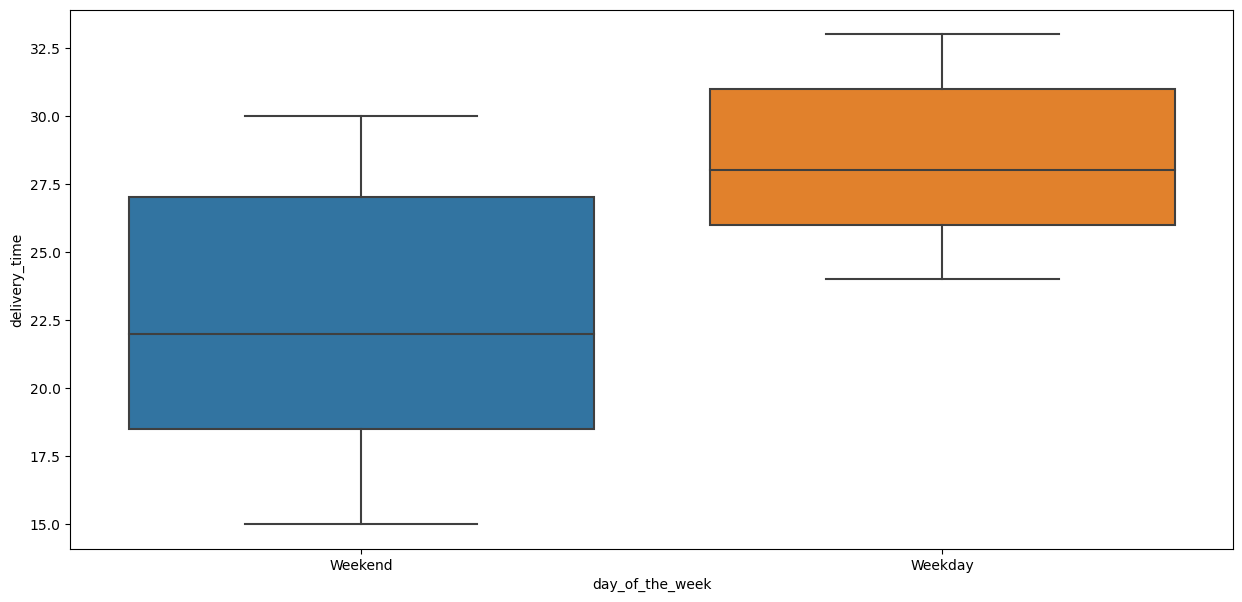

In [35]:
# will use boxplot for this analysis
plt.figure(figsize=(15,7))
sns.boxplot(df,x = 'day_of_the_week', y = 'delivery_time')
plt.show()

#### observations
 - we observe that the average time taken for delivery in weekday is higher than the one in weekend which make sense due to traffic in weekdays.
 - the delivery orders size in weekend is greater than the one in weekdays.
    
    

#### 4 - let's calculate the estimated revenue generated by the restaurants by sum the total cost respectively

In [36]:
# will use groupby function with respect to resuturant name grouped by sum of order cost and sort the outcomes as under:
est_rest_rev = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
est_rest_rev.shape

(178,)

In [37]:
est_rest_rev.head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

In [38]:
est_rest_rev.tail()

restaurant_name
Market Table                  6.79
Wa Jeal                       6.74
Cipriani Le Specialita        5.92
Big Wong Restaurant _¤¾Ñ¼    5.92
Hunan Manor                   5.72
Name: cost_of_the_order, dtype: float64

#### observations
- Restaurant name Shake Shack is the highest restaurant in terms of estimated revenue which make sense since it is the most highest restaurant in terms of no. of orders in the dataset.
- However, restaurant name Hunan Manor is the lowest one.

#### 5 - let's do multivariate analysis to explore the relationship between rating and delivery time

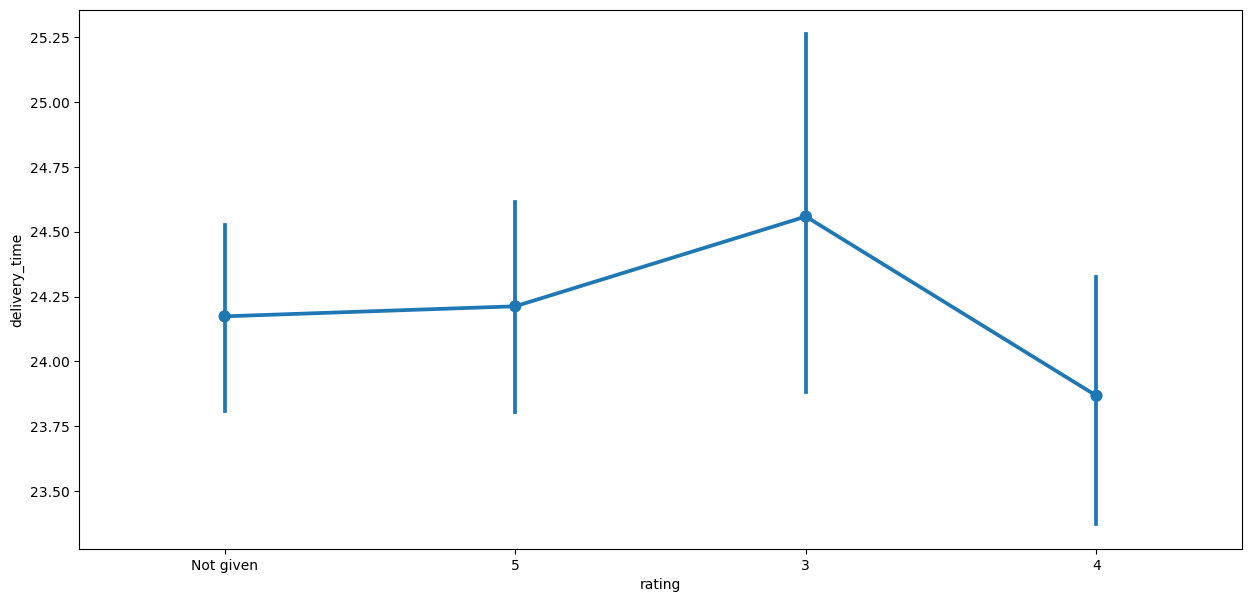

In [39]:
# will use pointplot for this analysis
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'delivery_time')
plt.show()

#### Observations:
- we observe that average rating 3 got the highest delivery time compare to other ratings
- average rating 4 got the lowest delivery time, even lower than who have rated with 5.
- therefore, delivery time whether it is low or hight has no major effect on the customers who have rated with 4 and 5 and their rating might be got affected with other factors such as food quality, taste, etc.

#### 6 - let's do multivariate analysis to explore the relationship between rating and food preparation time

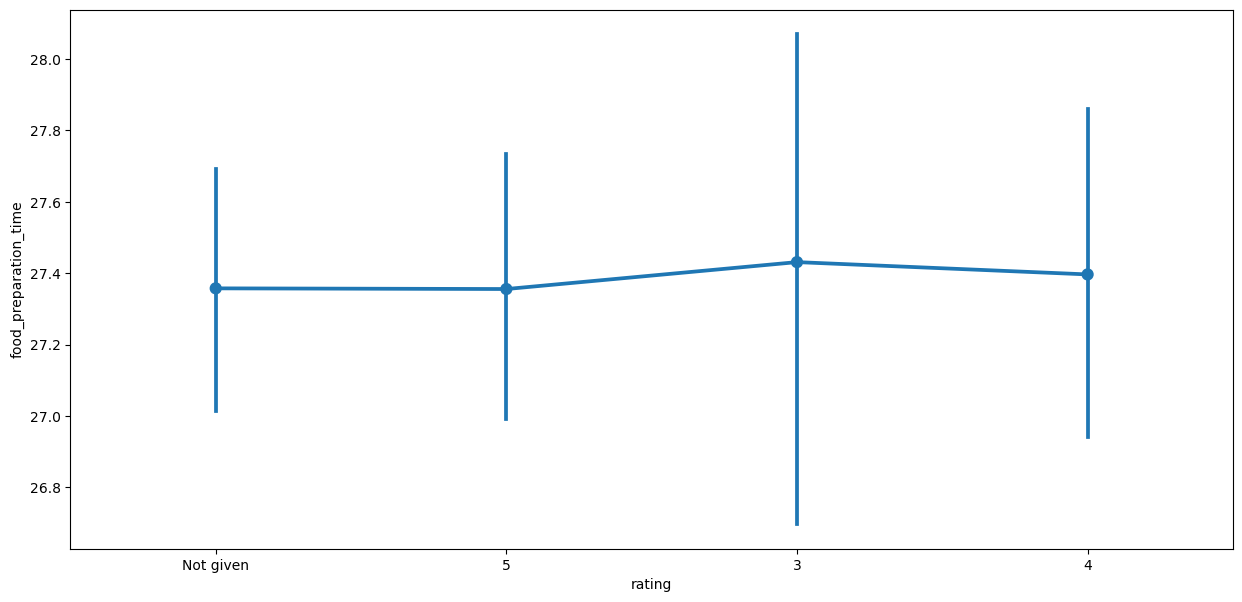

In [40]:
# will use point plot to visual this relationship
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'food_preparation_time') 
plt.show()

#### Observations
- we observe that there are no much variances in the relationship between rating and food preparation time.
- however, the customers who have rated with 3 got slightly the highest time for food preparation compare to others which make sense because that will affect the overall time for food delivery.
- and, the customer who have rated with 5 got slightly the lowest.

#### 7 - let's do multivariate analysis to explore the relationship between rating and cost of order

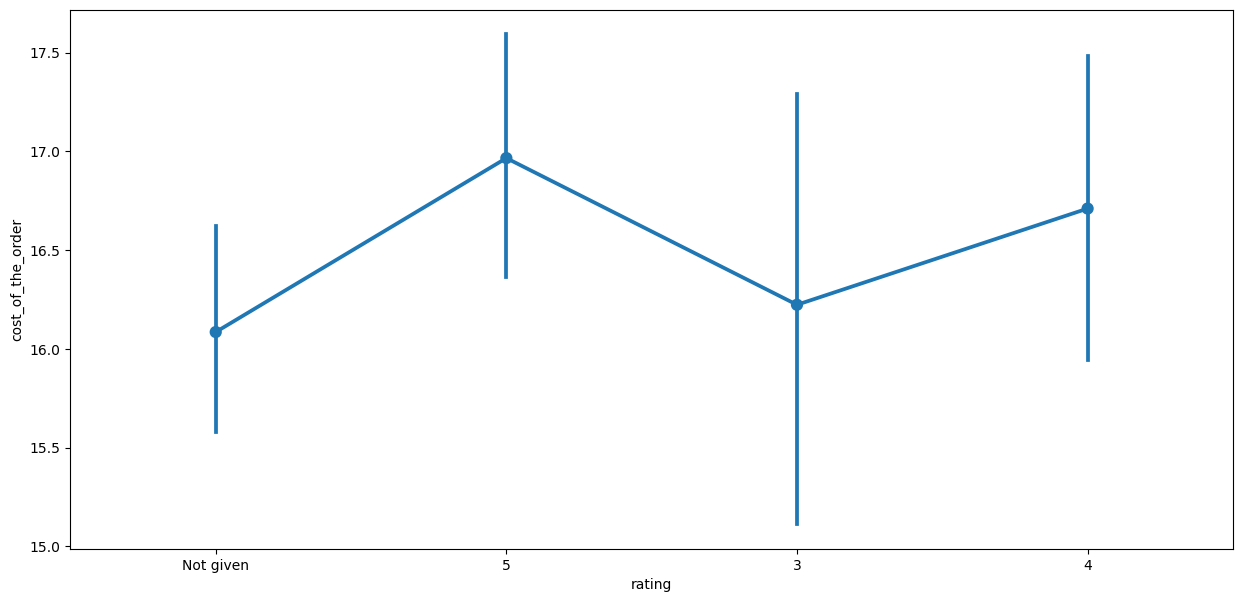

In [41]:
# will use point plot to visual this relationship
plt.figure(figsize=(15, 7))
sns.pointplot(df, x = 'rating', y = 'cost_of_the_order') 
plt.show()

#### Observations
- we observe that customers who have rated with 5 got the highest cost of orders compare to others
- and customers who have rated with 3 got the lowest cost.
- therefore, looking to the previous relationship between delivery time and rating will figure out that high cost orders might have good quality and taste and was not affected with delivery time.

#### 8 - let's do multivariate analysis to explore the correlations between all variables

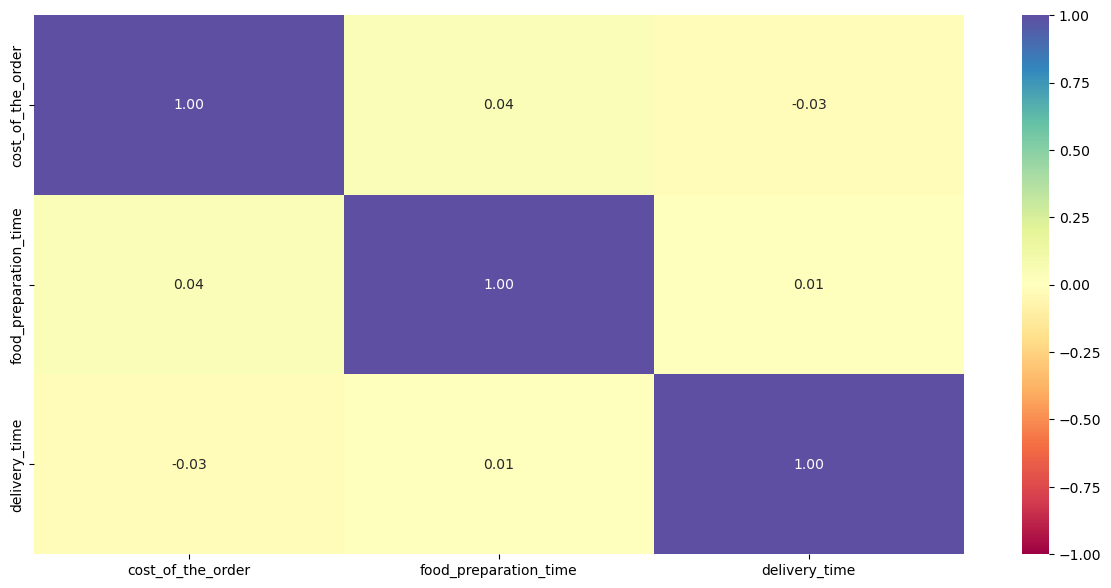

In [42]:
# for this visual will use the heatmap plot
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap = "Spectral")
plt.show()

#### Observations
- we observe that there is strong positive relationship between cost of the order and food preparation time
- and also, there is strong negative relationship between cost of the order and time of delivery
- moreover, there is low relationship between delivery time and food preparation time compare to others.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
# will make new data frame where will remove "not given" ratings and take a copy.

clear_rated = df[df['rating'] != 'Not given'].copy()
clear_rated.rating.value_counts() # will use value counts to ensure that Not given ratings are removed.



5    588
4    386
3    188
Name: rating, dtype: int64

In [44]:
# will check the data type of the rating col
clear_rated.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [45]:
# will convert the data type of rating to int to enable us do our calculations by usung astype func.
clear_rated.rating = clear_rated.rating.astype('int')
clear_rated.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                     int64
food_preparation_time      int64
delivery_time              int64
dtype: object

In [46]:
# now, will do groupby the restaurant name with the count of the rating respectivley
clear_rated_count = clear_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
clear_rated_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [47]:
# then, will make new data frame to get the restaurants whose ratings above 50 as per the company criteria
rest_rate_more50 = clear_rated_count[clear_rated_count['rating']> 50]['restaurant_name']
rest_rate_more50

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

#### Observations:
- now we got the restaurants who have count of rating more than 50 which 4 restaurants.
- let's figure out second condition in the company criteria which the avr rating must be above 4

In [48]:
# will create another data frame to get from the original data, all the ratings contains the restaurants names whose ratings are more than 50.
rest_R_mean_more4 = clear_rated[clear_rated['restaurant_name'].isin(rest_rate_more50)].copy()
rest_R_mean_more4


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [49]:
# then, will gruobby the restaurant name from the new data just created by the mean of rating to check which restaurants have avr rate more than 4
rest_R_mean_more4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations
considering the company criteria to check whose restaurants have rating count more than 50 and avr rating more than 4 and found out that, there are 4 restaurants match the given criteria and they are eligible for given discount as under:
1- The Meatball Shop
2- Blue Ribbon Fried Chicken
3- Shake Shack
4- Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# will make for loop using def function to claculate the revenue for each order as per given criteria:
def est_net_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(est_net_rev) # will create new col to calculate net rev for each order.
print(f" Total net revenue is {round(df['Revenue'].sum(),2)}$")

 Total net revenue is 6166.3$


#### Observations:
 the total net revenue of the company for the given data is around 6,166 Dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [51]:
# will create new col which will calculate total time required since food preparation to delivery time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [52]:
# then will calculate the total orders whose taking more than 60 min and calculate the percentages
total_time_more60 = df[df['total_time']> 60]
total_time_more60.shape[0] # will use shape method to get no. of enteries

200

In [53]:
# will calculate the percentage of the orders take more than 60 min out of all orders as under
total_time_more60_percent = round((200 / df.shape[0]) *100,2)
total_time_more60_percent

10.54

In [54]:
print(f"the percentage of the orders take more than 60 min is {total_time_more60_percent}%")

the percentage of the orders take more than 60 min is 10.54%


#### Observations:
the percentage of the orders take more than 60 min is 10.54% which seems to be low percentage 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
weekday_del_mean = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
weekday_del_mean    

28

In [56]:
weekend_del_mean =  round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
weekend_del_mean

22

In [57]:
print(f" the delivery time mean for weekday is {weekday_del_mean} min and delivery time mean for weekend is {weekend_del_mean} min")

 the delivery time mean for weekday is 28 min and delivery time mean for weekend is 22 min


#### Observations:
we observe that the delivery time mean in weekdays is higher than the one in weekend, it could be beacuse the usual traffic in weekdays compare to weekend.

### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Looking to the customers rating which found that around 736 ratings was not given which almost 38% of rating was not marked. Therefore, I suggest enabling a program/option on the company application where the customer has to rate the previous order before requesting new one. So that, we ensure the collection of All ratings.
- I suggest also to have categories for ratings such as delivery time, food quality and taste, so that, the company can clearly identify the real factors affecting the customers rating.
- Looking to most popular cuisine which looks like American one is highly recommend by a big group of customers, therefore, I suggest the company to make more contracts with same cuisine type and offer more promotional offers for same type.
- Looking to the average mean of delivery time in weekdays compare to weekend, which found it a bit higher, therefore, I suggest increasing no. of dispatchers in weekdays to maintain the consistency of delivery time.
- Finally, for the restaurants got low rating, I suggest the company to figure out the reason or have a strategy of set some restrictions at the time of renewal of their contracts.


### Recommendations:
I recommend the company to treat the issue of the missing rating and attract more restaurants has American cuisine as well as look at the low rating/ orders of the other cuisine types and find out the reasons of low ratings. I also, recommend the company to slightly increase the number of deliveries guys in weekdays to maintain the consistency and provide more promotional offers.
Finally, I may recommend also the company to have loyalty program for their customers who have reached certain criteria in terms of no of orders per month. I believe that will help to increase the business. 


---